<a href="https://colab.research.google.com/github/joaotinti75/Machine-Learning/blob/main/Crop_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando as bibliotecas**


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## **Exibindo a imagem utilizada para teste**

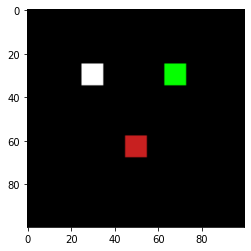

(100, 100, 3)


In [2]:
img = cv2.imread('imagem.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#rows, columns, channels
print(img.shape)

## **Função que recorta a imagem**

In [3]:
def crop_image(img, crop_size):
  '''
  Função que recorta uma imagem e retorna uma lista com os pedaços recortados 
  1° parâmetro: imagem
  2° parâmetro: dimensão do recorte
  retorno: lista contendo os pedaços recortados (cada item da lista é um numpy array)
  '''
  cropped_images = []

  for row in range(0, img.shape[0], crop_size):
    if (row + crop_size) <= img.shape[0]:
      for column in range(0, img.shape[1], crop_size):
        if (column + crop_size) <= img.shape[1]:
          crop_img = img[row:row+crop_size, column:column+crop_size]
          if np.any(np.unique(crop_img)) == True: #Excluindo imagens totalmente escuras
            cropped_images.append(crop_img)

  return cropped_images

cropped_images = crop_image(img, 25)


In [4]:
print('Número de imagens: ', len(cropped_images))

Número de imagens:  4


## **Plotando as imagens recortadas**

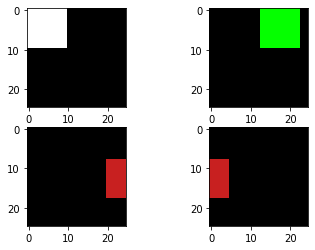

In [5]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(cv2.cvtColor(cropped_images[0], cv2.COLOR_BGR2RGB))
axarr[0,1].imshow(cv2.cvtColor(cropped_images[1], cv2.COLOR_BGR2RGB))
axarr[1,0].imshow(cv2.cvtColor(cropped_images[2], cv2.COLOR_BGR2RGB))
axarr[1,1].imshow(cv2.cvtColor(cropped_images[3], cv2.COLOR_BGR2RGB))

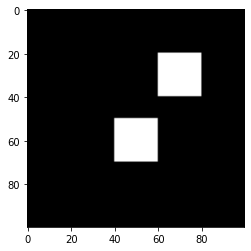

(100, 100, 3)


In [6]:
def paint_pixels(img, crop_size):

  #Criando uma imagem cópia da original
  pixeled_img = img.copy()

  for row in range(0, img.shape[0], crop_size):
    if (row + crop_size) <= img.shape[0]:
      for column in range(0, img.shape[1], crop_size):
        if (column + crop_size) <= img.shape[1]:
          crop_img = img[row:row+crop_size, column:column+crop_size]
          #Substituir essa condição pela resposta do modelo à imagem recortada
          if len(np.unique(crop_img)) == 3:
            #Essa linha pinta os pixels 
            pixeled_img[row:row+crop_size, column:column+crop_size] = (255,255,255)
          else:
            pixeled_img[row:row+crop_size, column:column+crop_size] = (0,0,0)
  
  img_gray = cv2.cvtColor(pixeled_img, cv2.COLOR_BGR2GRAY)
  
  bin_method = cv2.THRESH_BINARY
  ret, bin_img = cv2.threshold(img_gray, 135, 255, bin_method)

  return bin_img

bin_img = paint_pixels(img, 10)
plt.imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
plt.show()
print(img.shape)
